# Integrals, interpolation, regression

https://www.youtube.com/watch?v=4grhQ5Y_MWo

Integration in Python

$ \int_{0}^{2} (3x^2 + 1)  dx$. La solucion seria $10$

## Integration Analytical

Se necesita `sympy` 

## Integration Numerical

In [1]:
from scipy.integrate import quad

In [2]:
def f(x):
    """ Returns the value of the function at a given x point """
    return 3.0 * x**2 + 1

x=3
print(f"f(x)= {f(x)} cuando x = {3}")

i = quad(f, 0, 2)
print(f"Numerical integration: {i[0]:.3f} | Error: {i[1]:.3g}")


f(x)= 28.0 cuando x = 3
Numerical integration: 10.000 | Error: 1.11e-13


## Linear Regression

In [3]:
import numpy as np
x = np.array([0,1,2,3,4,5])
y = np.array([0,0.8,0.9,0.1,-0.8,-1])
print(x)
print(y)

# Modelos de polynomial regression 1ro, 2do, y 3er grado.
p1 = np.polyfit(x,y,1)
p2 = np.polyfit(x,y,2)
p3 = np.polyfit(x,y,3)
# Least squares polynomial fit.
print(p1)

# Con scipy
from scipy.stats import linregress
# Calculate a linear least-squares regression for 
# two sets of measurements.
model = linregress(x,y)
print(list(model))

[0 1 2 3 4 5]
[ 0.   0.8  0.9  0.1 -0.8 -1. ]
[-0.30285714  0.75714286]
[np.float64(-0.3028571428571429), np.float64(0.7571428571428572), np.float64(-0.7195748873002584), np.float64(0.10693129655435198), np.float64(0.14613384974336482)]


## Non-linear regression

Funcion:
$$ y = a + \frac{b}{x} + c \ln(x) $$

Objective function:
$$ \Sigma_{i=1}^{n} (\frac{y_p - y_m}{y_m})^2$$

Initial SSE Objective: 20.0
Final SSE Objective: 0.0003651726174522593
Solution
a = 0.5514581077186436
b = 1.9269703429736875
c = 1.499428856802254


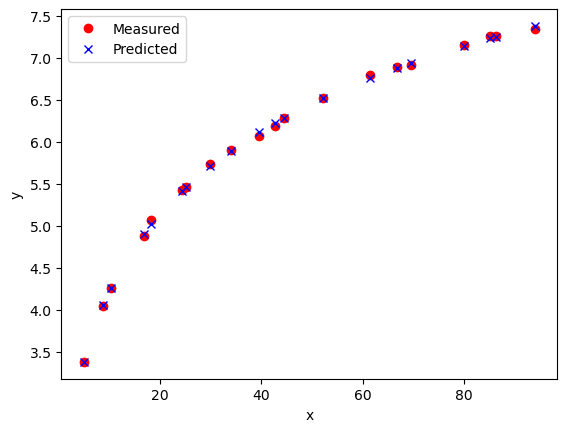

In [4]:
import numpy as np
from scipy.optimize import minimize

# load data
xm = np.array([18.3447,79.86538,85.09788,10.5211,44.4556, \
               69.567,8.960,86.197,66.857,16.875, \
               52.2697,93.917,24.35,5.118,25.126, \
               34.037,61.4445,42.704,39.531,29.988])

ym = np.array([5.072,7.1588,7.263,4.255,6.282, \
               6.9118,4.044,7.2595,6.898,4.8744, \
               6.5179,7.3434,5.4316,3.38,5.464, \
               5.90,6.80,6.193,6.070,5.737])

# calculate y
def calc_y(x):
    a,b,c = x
    y = a + b/xm + c*np.log(xm)
    return y

# define objective
def objective(x):
    """ Sum of normalized squares """
    return np.sum(((calc_y(x)-ym)/ym)**2)

# initial guesses
x0 = np.zeros(3)

# show initial objective
print('Initial SSE Objective: ' + str(objective(x0)))

# optimize
# bounds on variables
bnds100 = (-100.0, 100.0)
no_bnds = (-1.0e10, 1.0e10)
bnds = (no_bnds, no_bnds, bnds100)
solution = minimize(objective,x0,method='SLSQP',bounds=bnds)
x = solution.x
y = calc_y(x)

# show final objective
print('Final SSE Objective: ' + str(objective(x)))

# print solution
print('Solution')
print('a = ' + str(x[0]))
print('b = ' + str(x[1]))
print('c = ' + str(x[2]))

# plot solution
import matplotlib.pyplot as plt
plt.figure(1)
plt.plot(xm,ym,'ro')
plt.plot(xm,y,'bx');
plt.xlabel('x')
plt.ylabel('y')
plt.legend(['Measured','Predicted'],loc='best')
plt.show()